In [1]:
pallete=["#d33c83","#ff499e","#d264b6","#a480cf","#779be7","#5abdff"]

In [2]:
import pandas as pd

df = pd.read_csv("test_msa_bb.csv")
df.head()

C:\Users\Nioosha\mambaforge\lib\site-packages\IPython\core\interactiveshell.py:3441: DtypeWarning: Columns (4,18) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


email  \
0  5b31baf92171234adacc3aaf0ee5a14cf0b1adb35194   
1  b47a23dfa8a71dd52879e32b46b95d3b0673e6ea38b0   
2  6929f69b848bb6ea80905aa169a80c962644f6e1ea89   
3  c5c2d17bbf20b772ff72abfcb2f5021cf02cebe422d3   
4  e60a1afac6a840b383ad8172de7304eb404348e72f66   

                                          phone  \
0  3567550f9cf51d6b9fe94cbbf17f8cf5da83677b20a6   
1  0ff8479f1516d3de1091624ded4b0eeb2a0144854801   
2  09a7a47a69b67e1d65c4ce385ec430bf49397261f38c   
3  c15aa8b05de5ccd5816dc3f69e8babbff8b8998b0e64   
4  f09585362157ce6813345220cc5de55cc72e01c9905f   

                                     first_name  \
0  be34ad33b31774df67565b3db888fa2361331e6566f1   
1  e6d5c8867b7a46dc7b81cdc689e47fe84647d49022d6   
2  208ad55e4c4200ca42a73ab260efd6df57efccc95aad   
3  f805bcb3efc982ec60744b3cc23f11ed1a4a0c4b783f   
4  09c12d01508bb6b857cf2f84199fb3134b58985806b4   

                                      last_name    zip           city  state  \
0  1086b76dc02f395636156d9ca711d54a043f6640c690  92027         licata    NaN   
1  bd3dae5fb91f88a4f0978222dfd58f59a124257cb081  36100        vicenza    NaN   
2  3d67c6abd93267d5c5cb698b79401f76615b8f47f9a9  71016     san severo    NaN   
3  0f46ffbc599ddb2ebbd4b73dad90f240f502798a7986  20038  busto garolfo    NaN   
4  cd165a891948a7ffae249980f8ca64e963f73f4116bc  10048         vinovo    NaN   

  country  birthday_year  gender  age conversion_name conversion_date  \
0      IT            NaN     NaN  NaN        Purchase      2020-08-08   
1      IT            NaN     NaN  NaN          Cancel      2020-08-07   
2      IT            NaN     NaN  NaN  ReturnToSender      2020-08-07   
3      IT            NaN     NaN  NaN        Purchase      2020-08-08   
4      IT            NaN     NaN  NaN          Cancel      2020-08-07   

   conversion_id  conversion_value  conversion_value_margin  handling_cost  \
0         918183             377.0                   154.22           18.0   
1         917656            -643.5                   -48.29           -5.0   
2         905587            -318.5                  -198.33         -183.1   
3         918391             462.8                   307.12           44.0   
4         917776            -513.5                     5.17           -5.0   

  conversion_currency ad_click_id_value  
0                 EUR               NaN  
1                 EUR               NaN  
2                 EUR               NaN  
3                 EUR               NaN  
4                 EUR               NaN

# Checking data integrity
 
1. Check if emails are valid
 (I didn't actaully do this since the data isn't real)
2. Check if the conversion_name is one of the three possibilities
3. Check if in the case of a Purchase, conversion_value and conversion_value_margin are positive values, the handling_cost is a negative value, and in the case of a Return or Cancel the opposite holds.



In [3]:
# df = df[df['email'].str.match("^[a-zA-Z0-9_.+-]+@[a-zA-Z0-9-]+\.[a-zA-Z0-9-.]+$")== True]
# check if conversion_name is valid

# Profiling

to get a general idea of how the data is distributed

In [4]:
# I ran this block of code locally and I have the saved output


# !pip install pandas_profiling

# import pandas_profiling as pp

# pp.ProfileReport(df)

# RFM Analysis

we start by finding the corresponding time interval of the transactions.

In [5]:
df['conversion_date'] = pd.to_datetime(df['conversion_date'])
print('conversion_date from {} to {}'.format(df['conversion_date'].min(),df['conversion_date'].max()))

conversion_date from 2019-01-01 00:00:00 to 2020-12-01 00:00:00


add the new columns and aggregates to the table, and group by ad_click_id_value

In [6]:
df['monetary'] = df['conversion_value'] + df['conversion_value_margin'] + df["handling_cost"]
df['frequency'] = 1
df['recency'] = df['conversion_date']
last_date = df['conversion_date'].max()
df_rfm = df.groupby(['ad_click_id_value']).agg({
        'recency': lambda x: (last_date - x.max()).days,
        'frequency': 'count',
        'monetary': 'sum'})
df_rfm.head(10)

recency  frequency  monetary
ad_click_id_value                                             
006b7057a2b11980b4e92f06bdb134d0       89          1   2391.76
006e9035a1b81631bb16cee8ea204546      177          1    399.33
0156790b9b7e1069ae6d27dac43982d7      186          1   2379.14
01cf20a4fa7f10b891027e1d6473d904      204          1    275.06
01d72fc1091f1cb4a9b970da1233abfa      130          1   1695.34
022b9594b4c3117dae0bca8506571f96      137          1    701.97
02d03149f9121d69bd566efe2c20b182       11          1   6524.48
02dece68400b12b185ae90dfa73c1dec      205          1   2317.70
0368ad3d30381965bcdff3d5bd3020a0      168          1    793.72
0387719a1c771902af752ecdd1ed5b42       84          1   1590.64

We could have also defined frequency such that purchases have a positive contributer to the frequency whereas returns and cancellations have a negative one, or just ignore returns and cancellations when counting the frequency. We will take a look at the frequency plot as well as the other parameters to see if any other decision needs to be made.

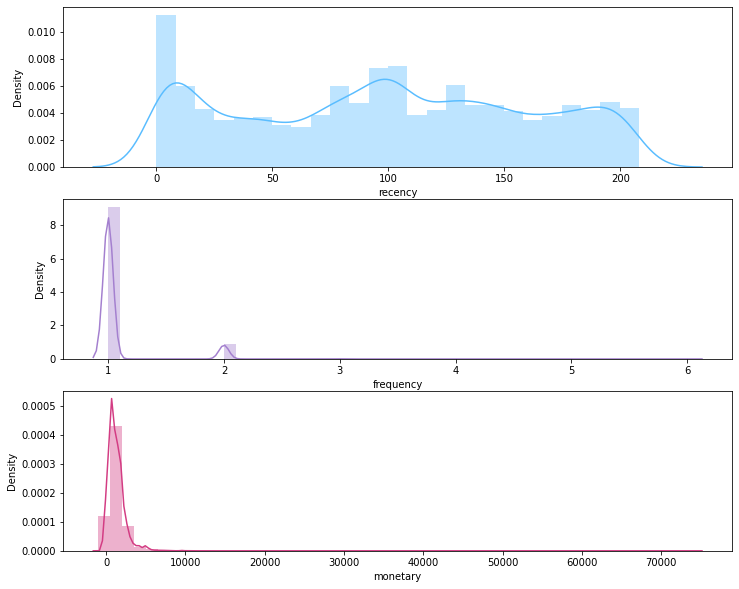

frequency in [1,6]
recency in [0,208]
monetary in [-1055,74584]


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

plt.figure(figsize=(12,10))
plt.subplot(3, 1, 1); sns.distplot(df_rfm['recency'],color=pallete[5])
plt.subplot(3, 1, 2); sns.distplot(df_rfm['frequency'],color=pallete[3])
plt.subplot(3, 1, 3); sns.distplot(df_rfm['monetary'],color=pallete[0])
plt.show()

print("frequency in [%d,%d]" % (min(df_rfm["frequency"]),max(df_rfm["frequency"])))
print("recency in [%d,%d]" % (min(df_rfm["recency"]),max(df_rfm["recency"])))
print("monetary in [%d,%d]" % (min(df_rfm["monetary"]),max(df_rfm["monetary"])))

Considering how frequency is distributed, it would be counter productive to define frequency such that returns and cancellations contribute negatively to it.</br>
Frequency values aren't well distributed. This should be dealt with if needed.

## RFM scores

At first we calculate the rfm scores by summing the scores of a costumer at each of the three parameters.
The scores can be integers in [1,6] and are determined by the 6-quantiles.   

In [8]:
# we choose to cut the data into 6 parts because frequency can be in [1,6] 
# and it can't be cut into parts so we will just need to add the frequency 
# value. to avoid scaling the cut the other ones in 6 parts.

# the lower the recency the better
r_labels = range(6, 0, -1) 
# the higher the frequency and the monetary value the better
m_labels = range(1, 7)

r_groups = pd.qcut(df_rfm['recency'], q=6, labels=r_labels)
# frequency is only 1-6 so we will just add the actual frequency 
m_groups = pd.qcut(df_rfm['monetary'], q=6, labels=m_labels)

# sum the quantile lables and the frequency value
rfm=[]
r=[]
f=[]
m=[]
c=0
for index,row in df_rfm.iterrows():
    r.append(r_groups.values[c])
    f.append(row['frequency'])
    m.append(m_groups.values[c])
    rfm.append(r_groups.values[c]+m_groups.values[c]+row['frequency'])
    #if m_groups.values[c] == 6:
    #    print("high monetary: " + str(row["monetary"]))
    c+=1
df_rfm["r"] = r
df_rfm["f"] = f
df_rfm["m"]=m
df_rfm["rfm"] = rfm
df_rfm= df_rfm.drop(columns=["recency","frequency","monetary"])
df_rfm.head(10)

r    f  m   rfm
ad_click_id_value                                
006b7057a2b11980b4e92f06bdb134d0  4  1.0  6  11.0
006e9035a1b81631bb16cee8ea204546  1  1.0  1   3.0
0156790b9b7e1069ae6d27dac43982d7  1  1.0  6   8.0
01cf20a4fa7f10b891027e1d6473d904  1  1.0  1   3.0
01d72fc1091f1cb4a9b970da1233abfa  3  1.0  5   9.0
022b9594b4c3117dae0bca8506571f96  2  1.0  2   5.0
02d03149f9121d69bd566efe2c20b182  6  1.0  6  13.0
02dece68400b12b185ae90dfa73c1dec  1  1.0  6   8.0
0368ad3d30381965bcdff3d5bd3020a0  2  1.0  3   6.0
0387719a1c771902af752ecdd1ed5b42  4  1.0  5  10.0

get a general idea about how the score is distributed

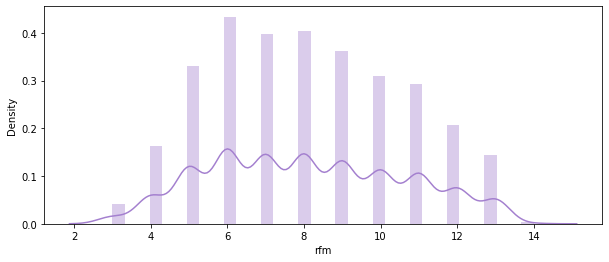

rfm in [3,14]


In [9]:
plt.figure(figsize=(10,4))
sns.distplot(df_rfm['rfm'],color=pallete[3])
plt.show()

print("rfm in [%d,%d]" % (min(df_rfm["rfm"]),max(df_rfm["rfm"])))

Here we sort the customers by their RFM scores

In [10]:
df_sorted = df_rfm.sort_values(by='rfm',ascending=False)
df_sorted

r    f  m   rfm
ad_click_id_value                                                  
CjwKCAjwq_D7BRADEiwAVMDdHnUXI-jpQtM5j-uUHpiEWo_...  6  2.0  6  14.0
CjwKCAjw2dD7BRASEiwAWCtCb1T3bPUSIj3gTxN7vavxIHp...  6  2.0  6  14.0
CjwKCAiA2O39BRBjEiwApB2IkhidEqND3LmOFdWbuEm2_Gq...  6  2.0  6  14.0
CjwKCAiAnvj9BRA4EiwAuUMDf90evwz4XQNbr81Yp3bJQ-z...  6  2.0  6  14.0
EAIaIQobChMIkL6areGH7QIVB813Ch3RrwQUEAAYASAAEgI...  6  2.0  6  14.0
...                                                ..  ... ..   ...
Cj0KCQjww_f2BRC-ARIsAP3zarEIvvilCsjYELIokmtYY3z...  1  1.0  1   3.0
Cj0KCQjww_f2BRC-ARIsAP3zarEFPr2NVH8uQpyMS9S-m2J...  1  1.0  1   3.0
CjwKCAjw5Ij2BRBdEiwA0Frc9ZT8wpT_Vjej_wQWVhyuOUE...  1  1.0  1   3.0
CjwKCAjw5Ij2BRBdEiwA0Frc9ZU_gkX0OKt0wivJrnScnS6...  1  1.0  1   3.0
EAIaIQobChMIrrr7xozH6QIVBeAYCh15iwv-EAkYFCABEgL...  1  1.0  1   3.0

[14679 rows x 4 columns]

## Grouping customers

The head and the tail of the dataframe looks reasonable enough.
We will name the costumer categories with respect to rfm score as folloes: 
* 3,4 : "basically 0"
* 5,6 : "low"
* 7,8: "meh :( nope"
* 9,10: "meh :) ok"
* 11,12: "high"
* 13,14: "WOW"

In [11]:
df_rfm.head()

def rfm_level(df_rfm):
    if df_rfm['rfm'] == 3 or df_rfm['rfm'] == 4:
        return 'Basically 0'
    elif df_rfm['rfm'] == 5 or df_rfm['rfm'] == 6:
        return "Low"
    elif df_rfm['rfm'] == 7 or df_rfm['rfm'] == 8:
        return 'Slightly low'
    elif df_rfm['rfm'] == 9 or df_rfm['rfm'] == 10:
        return 'Slightly high'
    elif df_rfm['rfm'] == 11 or df_rfm['rfm'] == 12:
        return 'High'
    elif df_rfm['rfm'] == 13 or df_rfm['rfm'] == 14:
        return 'WOW'
    else:
        return '???'

df_rfm['cat'] = df_rfm.apply(rfm_level, axis=1)

df_rfm

r    f  m   rfm            cat
ad_click_id_value                                               
006b7057a2b11980b4e92f06bdb134d0  4  1.0  6  11.0           High
006e9035a1b81631bb16cee8ea204546  1  1.0  1   3.0    Basically 0
0156790b9b7e1069ae6d27dac43982d7  1  1.0  6   8.0   Slightly low
01cf20a4fa7f10b891027e1d6473d904  1  1.0  1   3.0    Basically 0
01d72fc1091f1cb4a9b970da1233abfa  3  1.0  5   9.0  Slightly high
...                              ..  ... ..   ...            ...
fe33d585abf41c566e918acd5b277ac8  4  1.0  6  11.0           High
fe95ac1fa13d1d734b39f2a933e56457  1  1.0  6   8.0   Slightly low
fe9a7ae35f091f3751792429e99c5ece  1  1.0  1   3.0    Basically 0
fec040c7fdb1189052a91e7da9394eea  1  1.0  2   4.0    Basically 0
ffa463e058ab1aba65d73d29404411b9  1  1.0  3   5.0            Low

[14679 rows x 5 columns]

To check if the previous approach for grouping the customers was a reasonable one, we will check the percentage of customers in each category.</br>
First, we'll make another dataframe grouped by the categories with the number of customers in each category which is used in our data visualisation later.

In [12]:
rfm_cat = df_rfm.groupby('cat').agg({
    'r': 'count'
}).round(1)

rfm_cat = rfm_cat.rename(columns={'r': 'count'})

ordered_indices = ["Basically 0", "Low", "Slightly low", "Slightly high","High","WOW"]
rfm_cat = rfm_cat.reindex(ordered_indices)

print(rfm_cat)

               count
cat                 
Basically 0      974
Low             3634
Slightly low    3807
Slightly high   3191
High            2371
WOW              702


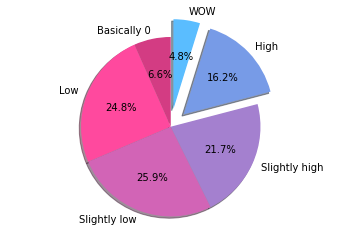

In [13]:
labels = rfm_cat.index.values.tolist()
sizes = rfm_cat["count"].tolist()
explode = (0,0,0,0,0.2,0.2)  # explode the best costumers

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90, colors=pallete)
ax1.axis('equal') 

plt.show()

### Pareto Principle
80% of your total sales are likely to come from your top 20% of users.</br>
</br>
It's a good idea to focus on the customers in "WOW" and "High" categories to increase sales.


 ## More detailed categories
 1. Most Valuable
 2. Most Loyal
 3. Newcomer
 4. Not Around Lately
 5. Lost Cause 

### 1. Most Valuable
The ones that have been active recently, frequently and are willing to pay a good amount of money. </br>
The customer that have a high score in all 3 areas.

### 2. Most Loyal
The customers with the most frequency are the most loyal ones.</br>
They are a good target for loyalty programs.

### 3. Newcomer
New costumers are the ones with low frequency and high recency.</br>
We need to keep these customers coming back.

### 4. Not Around Lately
Costumers with recency on the lower side which have high total scores. </br>
It may be worthwhile to remind them to come back, since they are customers that pay well and used to purchase frequently.


### 5. Lost Cause:
Customers with the lowest recency are the oness that we have lost. It has been a long time since they have been last active. </br>
It might be a good idea to investigate why these customers weren't satisfied or what competitor company do they prefer now and why.

In [14]:
def rfm_sublevel(df_rfm):
    if df_rfm['r'] in [5,6]  and df_rfm['f'] in [5,6] and df_rfm['m'] in [5,6] :
        return 'Most Valuable'
    elif df_rfm['f'] in [6,5]:
        return "Most Loyal"
    elif df_rfm['r'] in [6,5] and df_rfm['f'] == 1:
        return 'Newcomer'
    elif df_rfm['r'] in [2,3] and df_rfm['rfm'] in [13,14,15]:
        return 'Not Around Lately'
    elif df_rfm['r'] == 1:
        return 'Lost Cause'
    else:
        return '-'

df_rfm['subcat'] = df_rfm.apply(rfm_sublevel, axis=1)

df_rfm

r    f  m   rfm            cat      subcat
ad_click_id_value                                                           
006b7057a2b11980b4e92f06bdb134d0  4  1.0  6  11.0           High           -
006e9035a1b81631bb16cee8ea204546  1  1.0  1   3.0    Basically 0  Lost Cause
0156790b9b7e1069ae6d27dac43982d7  1  1.0  6   8.0   Slightly low  Lost Cause
01cf20a4fa7f10b891027e1d6473d904  1  1.0  1   3.0    Basically 0  Lost Cause
01d72fc1091f1cb4a9b970da1233abfa  3  1.0  5   9.0  Slightly high           -
...                              ..  ... ..   ...            ...         ...
fe33d585abf41c566e918acd5b277ac8  4  1.0  6  11.0           High           -
fe95ac1fa13d1d734b39f2a933e56457  1  1.0  6   8.0   Slightly low  Lost Cause
fe9a7ae35f091f3751792429e99c5ece  1  1.0  1   3.0    Basically 0  Lost Cause
fec040c7fdb1189052a91e7da9394eea  1  1.0  2   4.0    Basically 0  Lost Cause
ffa463e058ab1aba65d73d29404411b9  1  1.0  3   5.0            Low  Lost Cause

[14679 rows x 6 columns]

In [15]:
counts = df_rfm["subcat"].value_counts()
counts

-             7765
Newcomer      4496
Lost Cause    2417
Most Loyal       1
Name: subcat, dtype: int64

We should adjust the function if we want to have better distribution over subcategories.</br>
r and f are cut into 6-quantiles. Let's take a closer look at how f is distributed

In [16]:
df_rfm["f"].value_counts()

1.0    13363
2.0     1303
3.0       12
6.0        1
Name: f, dtype: int64

In [17]:
def rfm_sublevel(df_rfm):
    if df_rfm['r'] in range(3,7)  and df_rfm['f'] in range(2,7) and df_rfm['m'] in range(3,7) :
        return 'Most Valuable'
    elif df_rfm['f'] in range(2,7):
        return "Most Loyal"
    elif df_rfm['r'] == 6 and df_rfm['f'] == 1:
        return 'Newcomer'
    elif df_rfm['r'] in [2,3] and df_rfm['rfm'] in range(10,15):
        return 'Not Around Lately'
    elif df_rfm['r'] == 1:
        return 'Lost Cause'
    else:
        return '-'

df_rfm['subcat'] = df_rfm.apply(rfm_sublevel, axis=1)
counts = df_rfm["subcat"].value_counts()
counts

-                    8494
Newcomer             2321
Lost Cause           2262
Most Loyal           1192
Not Around Lately     286
Most Valuable         124
Name: subcat, dtype: int64

This is a more reasonable categorization

# Any other analysis?

Let's check the correlation matrix to see if there is any correlation between the rfm score and the region or any other variable

In [18]:
#do a full inner join 
df_joined = pd.merge(df, df_rfm, on="ad_click_id_value")
df_joined.head()

email  \
0  609f7d8ce047d04f036537281797e86efb556e4701dd   
1  d7edc3e5bb1242d673da87c450a8b1d607ae8f0564d3   
2  d7edc3e5bb1242d673da87c450a8b1d607ae8f0564d3   
3  9b8375e51cd4c686fd87c41b5c502c70a7aa0e7d6bb5   
4  bbf7e878c4e41af84ae50712b094506c14e0b4031fcf   

                                          phone  \
0  ea93f73fbea0390fafb333c3899d49f207433d3d9d80   
1  915d3cf35319dddfe2b6f56068dfc969a72dbbc41823   
2  915d3cf35319dddfe2b6f56068dfc969a72dbbc41823   
3  661d8836631db83c4959d4e20e0f5f29e7edf0f141ac   
4  fb5962ae56ca765ec6eaf0eca29f3660a2f3720923f2   

                                     first_name  \
0  f51ab9d849938a4f1e88903912ccdc17090df2bd9a43   
1  202bd009f816aa8a69e24c98a91ac0740899df316c88   
2  202bd009f816aa8a69e24c98a91ac0740899df316c88   
3  8b0db45cf72c172412c40ad81926e12f107d3b6b319c   
4  a1c2d05656b9041ce76a61d23aef096635931217a5cf   

                                      last_name    zip  \
0  868e06997a7cb9fc50d4bfdcf35c10a49e30d71cae29  00053   
1  cd2b3eb9fb19a662e7ca5851b93556518c4670d10f68  00040   
2  cd2b3eb9fb19a662e7ca5851b93556518c4670d10f68  00040   
3  5d7f15f2fce8ddb2dbef5c38be896c238ba7e0a432e3  34220   
4  f532301f854ad84ebccca8f6a294185357cb4d1eb9b9  65015   

                      city  state country  birthday_year  gender  ...  \
0            civitavecchia    NaN      IT            NaN     NaN  ...   
1                    ardea    NaN      IT            NaN     NaN  ...   
2                    ardea    NaN      IT            NaN     NaN  ...   
3  saint pons de thomieres    NaN      FR            NaN     NaN  ...   
4             montesilvano    NaN      IT            NaN     NaN  ...   

                                   ad_click_id_value monetary frequency  \
0  EAIaIQobChMI7MC-wbaL6wIVheh3Ch2kswWjEAAYASAAEg...   765.12         1   
1  EAIaIQobChMI4peP793h6gIVRuN3Ch0VzASeEAQYASABEg...  -946.95         1   
2  EAIaIQobChMI4peP793h6gIVRuN3Ch0VzASeEAQYASABEg...   766.85         1   
3  CjwKCAjw1K75BRAEEiwAd41h1KTjrn5mPxihVxsrQf72el...   691.40         1   
4  CjwKCAjwmrn5BRB2EiwAZgL9ohdqCnuqfapal4w7TeGb3A...   642.70         1   

     recency  r    f  m  rfm           cat      subcat  
0 2020-08-08  3  1.0  3  7.0  Slightly low           -  
1 2020-08-07  3  2.0  1  6.0           Low  Most Loyal  
2 2020-07-22  3  2.0  1  6.0           Low  Most Loyal  
3 2020-08-07  3  1.0  2  6.0           Low           -  
4 2020-08-08  3  1.0  2  6.0           Low           -  

[5 rows x 28 columns]

There might also be some correlation between the age or gender and the rfm score but we don't have that information in this dataset.

In [19]:
# the following method provides the correlation matrix between numerical values
#df_joined.corr()

#we are interested in the correlation matrix between the numerical and the categorical values
# I guess we could map our data to integers but to avoid redundant code we use pandas_profiling
# I ran the installation once.

# !pip install pandas_profiling

import pandas_profiling as pp

pp.ProfileReport(df_joined)

Summarize dataset:   0%|          | 0/41 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

The only possible feature, apart from age, gender and city about which we don't have meaningful information, that could have a meaningful correlation with the rfm score is the country.
Looking at the correlation Phi_k correlation matrix, we see that there is no correlation between these two variables.

# Profit over time

Another data we can extract from the dataset is the trend of profit made over time.
For this purpose we will consider the profit of a single transaction to be:

<center> $transaction\_profit = conversion\_value + conversion\_value\_margin + handling\_cost$ </center>
    
* All the variables are represented by their algebraic value

In [20]:
#add the profit column
df["profit"]=df["conversion_value"]+df["conversion_value_margin"]+df["handling_cost"]
#delete all columns but date and profit
to_keep=["conversion_date","profit"]
to_delete=[]
for col in df.columns:
    if col not in to_keep:
        to_delete.append(col)
# group by month
df_by_month=df.drop(columns=to_delete,axis=1).groupby(pd.Grouper(key='conversion_date', freq='1M')).sum()
#rename the dates and scale the profit to millions
indices=["Jan-19","Feb-19","Mar-19","Apr-19","May-19","Jun-19","Jul-19","Aug-19","Sep-19","Oct-19","Nov-19","Dec-19","Jan-20","Feb-20","Mar-20","Apr-20","May-20","Jun-20","Jul-20","Aug-20","Sep-20","Oct-20","Nov-20","Dec-20"]
df_by_month=pd.DataFrame({"profit_millions":df_by_month["profit"].tolist()},index=indices)
df_by_month["profit_millions"] /= 1000000
df_by_month.head()

profit_millions
Jan-19        28.281381
Feb-19         6.740673
Mar-19        10.650362
Apr-19        10.352362
May-19        10.835197

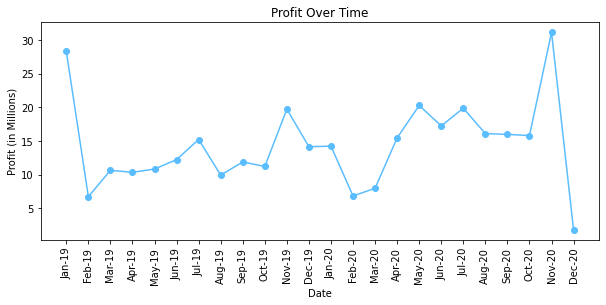

In [21]:
# scale the profit and make a line graph

plt.figure(figsize=(10,4))
plt.plot(df_by_month.index,df_by_month["profit_millions"],'o-',color=pallete[5])
plt.title('Profit Over Time')
plt.xlabel('Date')
plt.xticks(rotation='vertical')
plt.ylabel('Profit (in Millions)')
plt.show()

# Cancellation rate
We can also calculate the cancellation rate during this time period as an indicator for sales success.
In this section cancellation rate is calculated using the following formula.
<center> $ cancellation\;rate = \frac{cancellations + returns}{all\;transactions}$ </center>

In [22]:
counts = df["conversion_name"].value_counts()
counts

Purchase          267352
Return             19482
Cancel              8816
ReturnToSender      4350
Name: conversion_name, dtype: int64

In [23]:
c_rate=(counts["Return"]+counts["Cancel"]+counts["ReturnToSender"])/(counts["Return"]+counts["Cancel"]+counts["ReturnToSender"]+counts["Purchase"])
print(f"cancellation rate is: {c_rate}")

cancellation rate is: 0.10882666666666667


The cancellation rate was 10.8% during this period.